# Tugas 2 Komputasi Statistika (A)

Kelompok 4 :

- Amanda Daniswara Abidah (2206051563)

- Arzaqia Dwi Rangga (2206820623)

- Aqila Zahra Vanisa (2006568582)

- Herardita Cahyaning Wulan (200568632)

### Dataset Preparation

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import numpy as np
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_score

In [ ]:
url= 'https://raw.githubusercontent.com/justin-martinus/Assignment1-Gaussian-Mixture-Model/main/Iris.csv'

#dfp untuk data petal
dfp= pd.read_csv(url)
dfp = dfp.drop('Species', axis=1)
dfp = dfp.drop('Id', axis=1)
dfp = dfp.drop('SepalWidthCm', axis=1)
dfp = dfp.drop('SepalLengthCm', axis=1)

#dfs untuk data sepal
dfs= pd.read_csv(url)
dfs = dfs.drop('Species', axis=1)
dfs = dfs.drop('Id', axis=1)
dfs = dfs.drop('PetalWidthCm', axis=1)
dfs = dfs.drop('PetalLengthCm', axis=1)

### PetalLenght vs Petal witdh

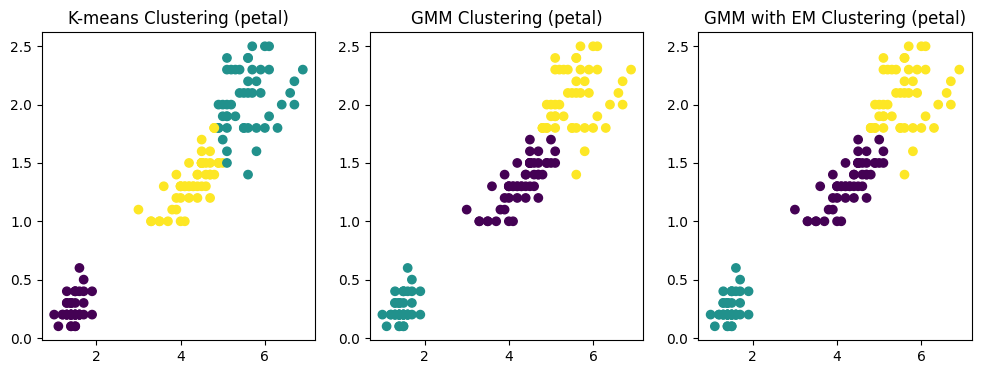

In [ ]:
# Muat dataset Iris sebagai contoh
iris = load_iris()
data = iris.data  # Data Iris
target = iris.target  # Label kelas (yang tidak akan digunakan)

# Pilih atribut yang akan digunakan untuk pengelompokan
# Misalnya, kita akan menggunakan PetalLength dan PetalWidth
X_petal = data[:, [2, 3]]

# 1. K-means Clustering
kmeans = KMeans(n_clusters=3)  # Ubah jumlah cluster sesuai kebutuhan
kmeans.fit(X_petal)
kmeans_labels = kmeans.labels_

# 2. Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=3)  # Ubah jumlah komponen sesuai kebutuhan
gmm.fit(X_petal)
gmm_labels = gmm.predict(X_petal)

# 3. GMM dengan Expectation-Maximization (EM)
gmm_em = GaussianMixture(n_components=3, covariance_type='full', init_params='kmeans', max_iter=100)  # Sesuaikan parameter sesuai kebutuhan
gmm_em.fit(X_petal)
gmm_em_labels = gmm_em.predict(X_petal)

# Visualisasi hasil pengelompokan
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.scatter(X_petal[:, 0], X_petal[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-means Clustering (petal)')

plt.subplot(132)
plt.scatter(X_petal[:, 0], X_petal[:, 1], c=gmm_labels, cmap='viridis')
plt.title('GMM Clustering (petal)')

plt.subplot(133)
plt.scatter(X_petal[:, 0], X_petal[:, 1], c=gmm_em_labels, cmap='viridis')
plt.title('GMM with EM Clustering (petal)')

plt.show()


### SepalLenght vs Sepal width

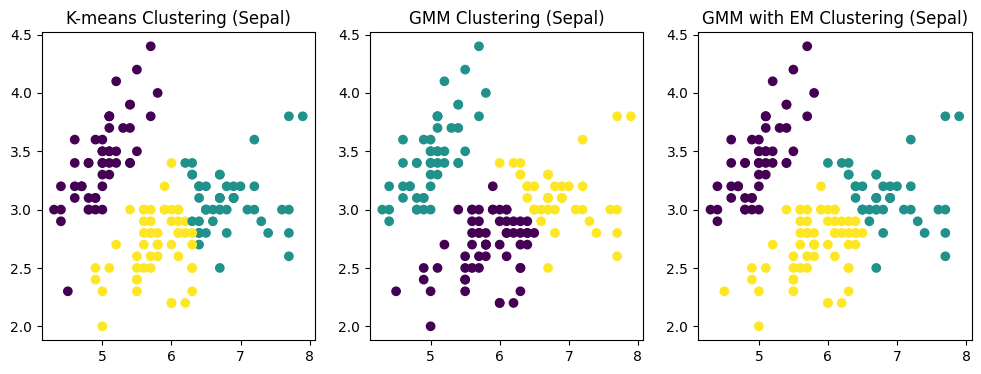

In [ ]:
# Pilih atribut yang akan digunakan untuk pengelompokan
# Kali ini kita akan menggunakan SepalLength dan SepalWidth
X_sepal = data[:, [0, 1]]

# 1. K-means Clustering
kmeans_sepal = KMeans(n_clusters=3)  # Ubah jumlah cluster sesuai kebutuhan
kmeans_sepal.fit(X_sepal)
kmeans_sepal_labels = kmeans_sepal.labels_

# 2. Gaussian Mixture Model (GMM)
gmm_sepal = GaussianMixture(n_components=3)  # Ubah jumlah komponen sesuai kebutuhan
gmm_sepal.fit(X_sepal)
gmm_sepal_labels = gmm_sepal.predict(X_sepal)

# 3. GMM dengan Expectation-Maximization (EM)
gmm_em_sepal = GaussianMixture(n_components=3, covariance_type='full', init_params='kmeans', max_iter=100)  # Sesuaikan parameter sesuai kebutuhan
gmm_em_sepal.fit(X_sepal)
gmm_em_sepal_labels = gmm_em_sepal.predict(X_sepal)

# Visualisasi hasil pengelompokan untuk Sepal Length vs Sepal Width
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.scatter(X_sepal[:, 0], X_sepal[:, 1], c=kmeans_sepal_labels, cmap='viridis')
plt.title('K-means Clustering (Sepal)')

plt.subplot(132)
plt.scatter(X_sepal[:, 0], X_sepal[:, 1], c=gmm_sepal_labels, cmap='viridis')
plt.title('GMM Clustering (Sepal)')

plt.subplot(133)
plt.scatter(X_sepal[:, 0], X_sepal[:, 1], c=gmm_em_sepal_labels, cmap='viridis')
plt.title('GMM with EM Clustering (Sepal)')

plt.show()

### 1a. K-Means Petal Lenght vs Petal width

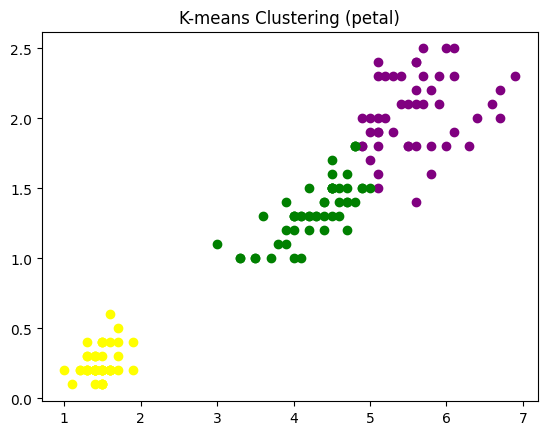

In [ ]:
#Training k-means model
kmeans = KMeans(n_clusters=3)
kmeans.fit(dfp)

#Predictions from kmeans
pred = kmeans.predict(dfp)
kmeans_petal = pd.DataFrame(dfp)
kmeans_petal['cluster']=pred

#Plotting results
color=['yellow','purple','green']
for k in range(0,3):
  dfp_1=kmeans_petal[kmeans_petal["cluster"]==k]
  plt.scatter(dfp_1['PetalLengthCm'],dfp_1['PetalWidthCm'],c=color[k])
plt.title('K-means Clustering (petal)')
plt.show()

### 1b. K-Means Sepal Lenght vs Sepal width

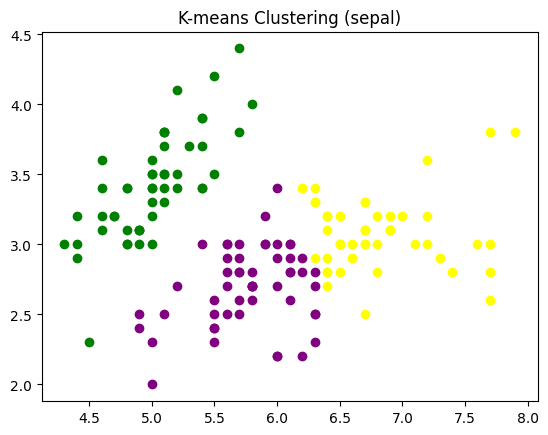

In [ ]:
#Training k-means model
kmeans = KMeans(n_clusters=3)
kmeans.fit(dfs)

#Predictions from kmeans
pred = kmeans.predict(dfs)
kmeans_sepal = pd.DataFrame(dfs)
kmeans_sepal['cluster']=pred

#Plotting results
color=['yellow','purple','green']
for k in range(0,3):
  dfs_1=kmeans_sepal[kmeans_sepal["cluster"]==k]
  plt.scatter(dfs_1['SepalLengthCm'],dfs_1['SepalWidthCm'],c=color[k])
plt.title('K-means Clustering (sepal)')
plt.show()

### 2a. GMM Petal Lenght vs Petal witdh

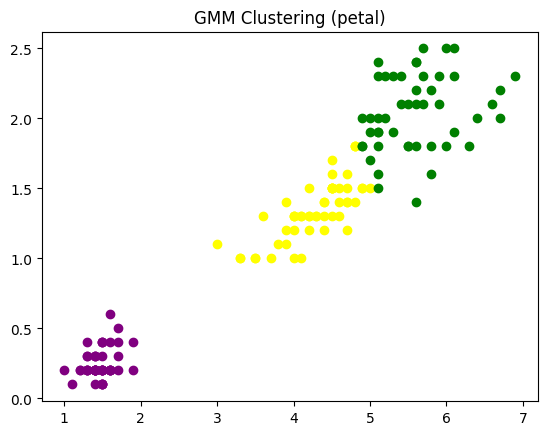

In [ ]:
#Training GMM
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(dfp)

#Prediction from gmm
labels = gmm.predict(dfp)
gmm_petal = pd.DataFrame(dfp)
gmm_petal['cluster'] = labels

color = ['yellow','purple','green']
for k in range(0,3):
  dfp_1= gmm_petal[gmm_petal["cluster"]==k]
  plt.scatter(dfp_1['PetalLengthCm'],dfp_1['PetalWidthCm'],c=color[k])
plt.title('GMM Clustering (petal)')
plt.show()

### 2b. GMM Sepal Lenght vs Sepal width

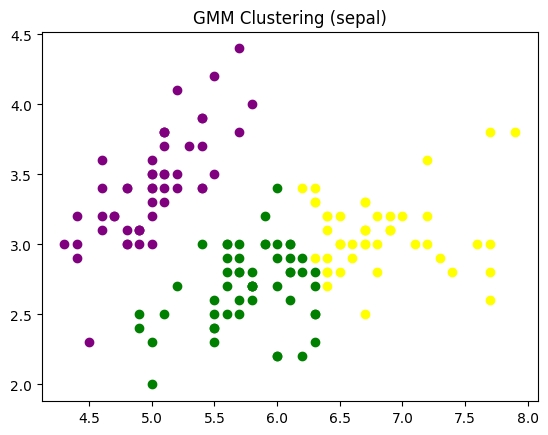

In [ ]:
#Training GMM
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(dfs)

#Prediction from gmm
labels = gmm.predict(dfs)
gmm_sepal = pd.DataFrame(dfs)
gmm_sepal['cluster'] = labels

color = ['yellow','purple','green']
for k in range(0,3):
  dfs_1= gmm_sepal[gmm_sepal["cluster"]==k]
  plt.scatter(dfs_1['SepalLengthCm'],dfs_1['SepalWidthCm'],c=color[k])
plt.title('GMM Clustering (sepal)')
plt.show()

### 3a. GMM dengan Expecation Maximization Petal Lenght vs Petal width

In [ ]:
iris = load_iris()
#GMM dengan jenis covarians yang berbeda pada data 2d
from sklearn.mixture import GaussianMixture
estimators = dict((cov_type, GaussianMixture(n_components=3,
                   covariance_type=cov_type, max_iter=20, random_state=0))
                  for cov_type in ['spherical', 'diag', 'tied', 'full'])
for (name,estimator) in estimators.items():
    estimator.fit(iris.data[:,2:5]) ## fits mixture model menggunakan EM

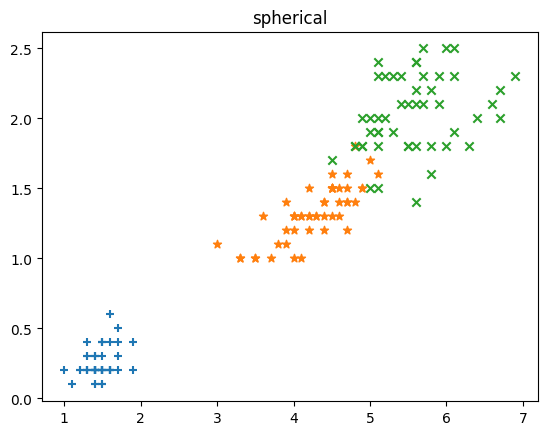

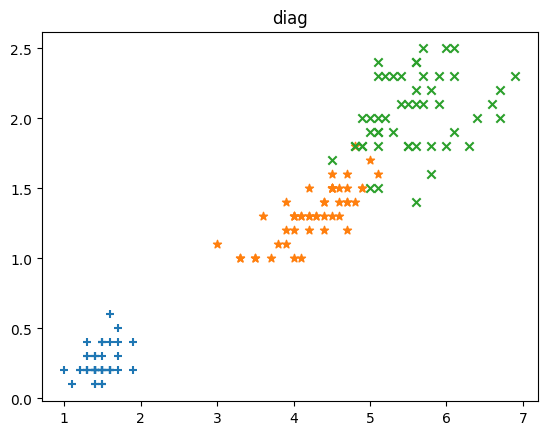

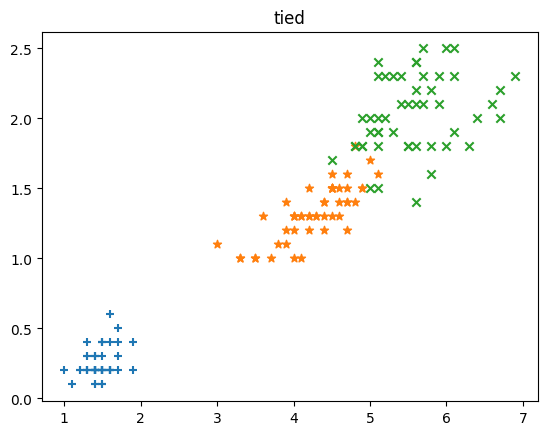

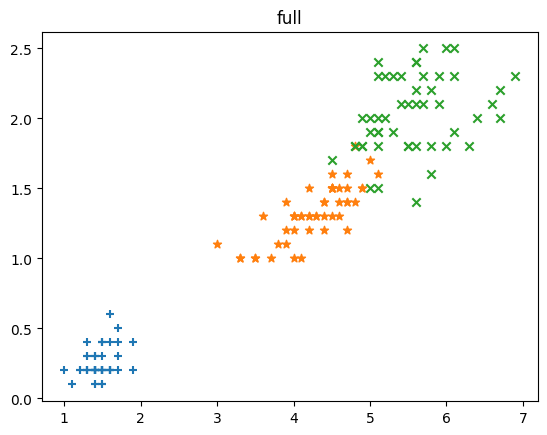

In [ ]:
#Visualisasi GMM dengan EM dan tipe covariansi yang berbeda
colors = ['blue','green','cyan']
markers = ['+','*','x']
n = 3
for (name,gmm) in estimators.items():
    for n, color in enumerate(colors):
        data = iris.data[iris.target == n]
        plt.scatter(data[:, 2], data[:, 3], marker=markers[n]) 
        if gmm.covariance_type == 'full':
            cov = gmm.covariances_[n]
        elif gmm.covariance_type == 'tied':
            cov = gmm.covariances_
        elif gmm.covariance_type == 'diag':
            cov = np.diag(gmm.covariances_[n])
        elif gmm.covariance_type == 'spherical':
            cov = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        pos = estimator.means_[n]
    plt.title(name)
    plt.show()

### 3b. GMM dengan Expecation Maximization Sepal Lenght vs Sepal witdh

In [ ]:
#Contoh Mencoba GMM dengan jenis covarians yang berbeda pada data 2d
from sklearn.mixture import GaussianMixture
estimators = dict((cov_type, GaussianMixture(n_components=3,
                   covariance_type=cov_type, max_iter=20, random_state=0))
                  for cov_type in ['spherical', 'diag', 'tied', 'full'])
for (name,estimator) in estimators.items():
    estimator.fit(iris.data[:,0:2]) ## fits mixture model menggunakan EM

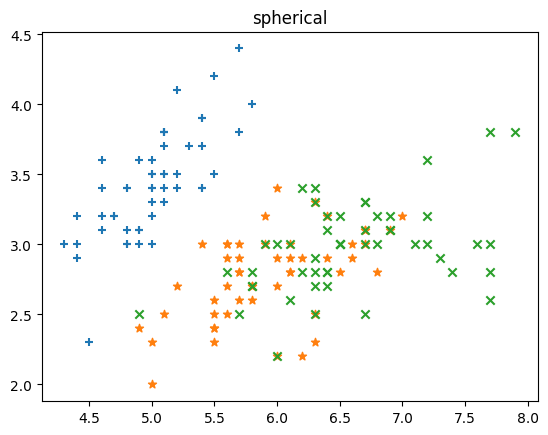

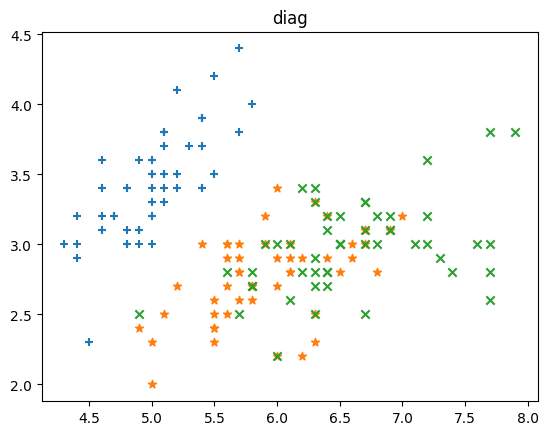

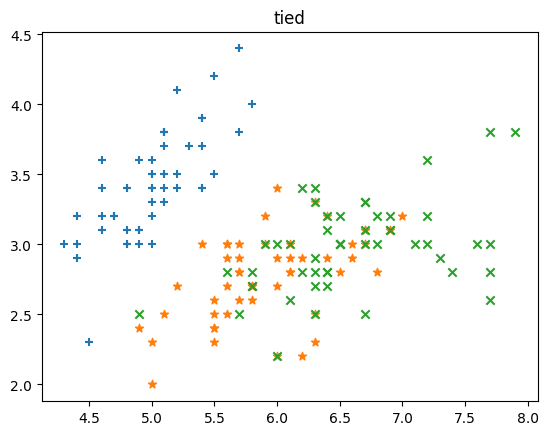

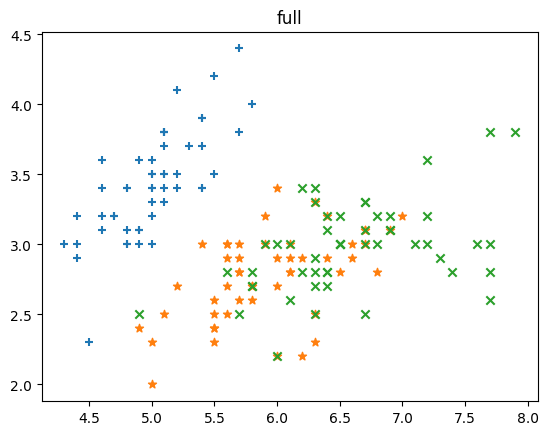

In [ ]:
#Visualisasi GMM dengan EM dan tipe covariansi yang berbeda
colors = ['blue','green','cyan']
markers = ['+','*','x']
n = 3
for (name,gmm) in estimators.items():
    for n, color in enumerate(colors):
        data = iris.data[iris.target == n]
        plt.scatter(data[:, 0], data[:, 1], marker=markers[n]) 
        if gmm.covariance_type == 'full':
            cov = gmm.covariances_[n]
        elif gmm.covariance_type == 'tied':
            cov = gmm.covariances_
        elif gmm.covariance_type == 'diag':
            cov = np.diag(gmm.covariances_[n])
        elif gmm.covariance_type == 'spherical':
            cov = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        pos = estimator.means_[n]
    plt.title(name)
    plt.show()

### Analisis perbandingan Kmeans dan GMM

In [ ]:
# Prediksi cluster untuk K-means Clustering (Petal)
kmeans_labels_petal = kmeans.labels_

# Prediksi cluster untuk GMM Clustering (Petal)
gmm_labels_petal = gmm.predict(X_petal)

# Prediksi cluster untuk K-means Clustering (Sepal)
kmeans_labels_sepal = kmeans_sepal.labels_

# Prediksi cluster untuk GMM Clustering (Sepal)
gmm_labels_sepal = gmm_sepal.predict(X_sepal)

In [ ]:
# 1. Silhouette Score untuk K-means Clustering (Petal)
silhouette_kmeans_petal = silhouette_score(X_petal, kmeans_labels_petal)

# 2. Silhouette Score untuk GMM Clustering (Petal)
silhouette_gmm_petal = silhouette_score(X_petal, gmm_labels_petal)

# 3. Silhouette Score untuk K-means Clustering (Sepal)
silhouette_kmeans_sepal = silhouette_score(X_sepal, kmeans_labels_sepal)

# 4. Silhouette Score untuk GMM Clustering (Sepal)
silhouette_gmm_sepal = silhouette_score(X_sepal, gmm_labels_sepal)

# Menampilkan Silhouette Score
print("Silhouette Score for Petal (K-means):", silhouette_kmeans_petal)
print("Silhouette Score for Petal (GMM):", silhouette_gmm_petal)
print("Silhouette Score for Sepal (K-means):", silhouette_kmeans_sepal)
print("Silhouette Score for Sepal (GMM):", silhouette_gmm_sepal)

Silhouette Score for Petal (K-means): 0.6604800083974887
Silhouette Score for Petal (GMM): 0.649505338687603
Silhouette Score for Sepal (K-means): 0.4450525692083638
Silhouette Score for Sepal (GMM): 0.43879934851959945


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4693bf7f-4453-40b5-badd-82b3e5e06923' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>